In [1]:
!pip install wooldridge

In [2]:
import wooldridge as woo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# importação dos dados
data = woo.dataWoo('vote1')

In [4]:
data.head()

,state,district,democA,voteA,expendA,expendB,prtystrA,lexpendA,lexpendB,shareA
0,AL,7,1,68,328.295990,8.737000,41,5.793916,2.167567,97.407669
1,AK,1,0,62,626.377014,402.476990,60,6.439952,5.997638,60.881039
2,AZ,2,1,73,99.607002,3.065000,55,4.601233,1.120048,97.014763
3,AZ,3,0,69,319.690002,26.281000,64,5.767352,3.268846,92.403702
4,AR,3,0,75,159.220993,60.054001,66,5.070293,4.095244,72.612473


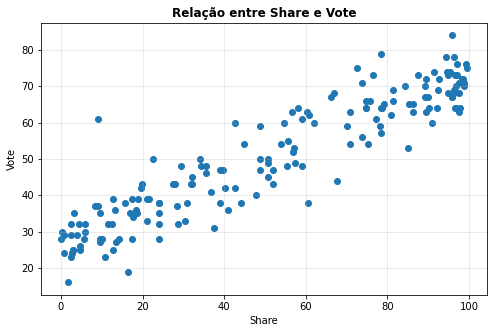

In [5]:
# Ajusta o tamanho da Figura
plt.figure(figsize=(8, 5))

# scatter plot
plt.scatter('shareA', 'voteA', data=data)

# labels
plt.title('Relação entre Share e Vote', fontweight='bold')
plt.xlabel('Share')
plt.ylabel('Vote')

# configura GridLines
plt.grid(alpha=0.3)
plt.show()

In [27]:
# Define a feature do Modelo
X = data[['shareA','prtystrA']] #.values.reshape(-1, 1)

# Define a target do Modelo
y = data.voteA.values.reshape(-1, 1)

# Separa os dados em treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [30]:
X.head(1)

,shareA,prtystrA
0,97.407669,41


In [31]:
y[0]

array([68], dtype=int64)

In [33]:
data[['shareA','prtystrA','voteA']]

,shareA,prtystrA,voteA
0,97.407669,41,68
1,60.881039,60,62
2,97.014763,55,73
3,92.403702,64,69
4,72.612473,66,75
...,...,...,...
168,17.383217,42,39
169,5.916420,53,32
170,13.378174,36,36
171,31.010078,46,38


In [13]:
# Instância o Modelo
linear_model = LinearRegression()

# Treina o Modelo
# Calcular os pesos, os parâmetros da minha Regressão Linear
linear_model.fit(X_train, y_train)

LinearRegression()

### Agora podemos obter os pesos que foram estimados no modelo:

In [14]:
# Intercepto do Modelo - Onde a reta vai cortar o y (Vote)
linear_model.intercept_

array([18.11114437])

In [15]:
# Parâmetro de inclinação (Peso/Parâmetro de Vote em relação a Share)
linear_model.coef_

array([[0.44131299, 0.18858395]])

In [16]:
# Previsões do Modelo
y_pred = linear_model.predict(X_train)

# Resíduo do Modelo (Diferença entre o valor REAL e o valor Ajustado)
resid = y_train - y_pred

InvalidIndexError: (slice(None, None, None), None)

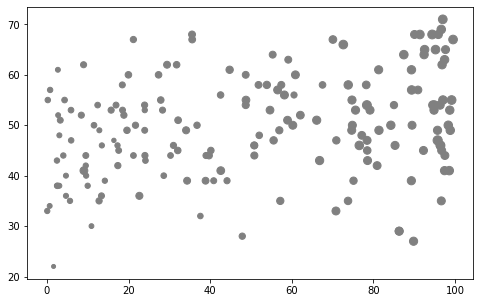

In [18]:
# Ajusta o tamanho da figura
plt.figure(figsize=(8, 5))
# Scatter Plot
plt.scatter('shareA', 'voteA', data=data, color='gray')
# Modelo
plt.plot(X_train, y_pred, color='black')
# Labels
plt.title('Regressão Linear entre Share e Vote', fontweight='bold')
plt.xlabel('Share')
plt.ylabel('Vote')
# Configura Gridlines
plt.grid(alpha=0.3)
plt.show()

### Precisamos avaliar a qualidade do nosso conj. de dados que esse modelo ainda NÃO viu.
<p> Vamos avaliar nosso modelo no conj. de teste.</p>

In [19]:
# Previsão com dados de treino
y_pred_train = linear_model.predict(X_train)

# Previsão com os dados de teste
y_pred_test = linear_model.predict(X_test)

In [20]:
### Define uma função para calcular o RMSE

###
### O Sklearn não possui o rmse por padrão - a gente usa a sqrt e obtém
###
def rmse(y_true, y_pred):
    "Calcula o RMSE."
    return round(sqrt(mean_squared_error(y_true, y_pred)), 2)

In [21]:
# Métrica nos dados de Treino
rmse(y_train, y_pred_train)

6.17

In [22]:
# Métrica nos dados de teste
rmse(y_test, y_pred_test)

6.3

### Temos duas formas para obter o R^2

### 1 - Forma

In [23]:
# Métrica nos dados de treino
linear_model.score(X_train, y_train)

0.86497671700581

In [24]:
# Métrica nos dados de teste
linear_model.score(X_test, y_test)

0.8546632313917686

### 2 - Forma

In [25]:
# Cálculo do R^2 usando diretamente a função do Sklearn
r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test, y_pred_test)

In [26]:
r2_train, r2_test

(0.86497671700581, 0.8546632313917686)

## Aprofundando os conceitos